# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

# A base escolhida foi - eeg-eye-state (estado de olhos abertos/fechados) 

https://www.openml.org/d/1471

O objetivo do trabalho é classificar se os olhos das pessoas estão abertos ou fechado. As 14 features são medições das ondas cerebrais dos indivídios e através delas, deve-se prever se os olhos estão ou não fechados.

Especificamente, uma gravação eletroencefalográfica (EEG) foi feita de uma única pessoa por 117 segundos (pouco menos de dois minutos) enquanto o sujeito abria e fechava os olhos, que eram gravados por uma câmera de vídeo. O estado aberto / fechado foi então registrado em cada etapa do rastreamento EEG manualmente.


### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
# importando as bibliotecas para leitura e tratamento dos dados na análise exploratória
import pandas as pd
import numpy as np

#from matplotlib import pyplot as plt


In [2]:
# montando o o google drive onde dados foram armazenados
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# leitura do arquivo
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhosBD.csv")

In [4]:
# vendos os 3 primeiros registros
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1


In [5]:
print ("A base escolhida tem 15 features: ", df.columns)

A base escolhida tem 15 features:  Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'Class'],
      dtype='object')


In [6]:
print ("O target possui duas classes: ",df["Class"].unique())

O target possui duas classes:  [1 2]


A classe possui dois valores, que definem se os olhos estão abertos ou fechados.
'1' indica o estado de olho fechado e '2' o estado de olho aberto. 

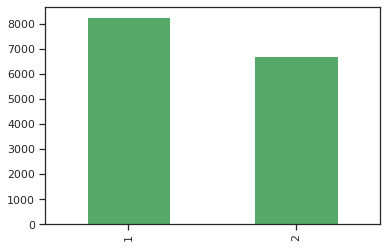

In [204]:
# Avaliando o target
# É possível identificar que há mais olhos fechados (1) que abertos (2)
df['Class'].value_counts().plot(kind='bar', color='g')

In [7]:
print ("A base possui ", len(df), " registros")

A base possui  14980  registros


Text(0, 0.5, 'Variáveis')

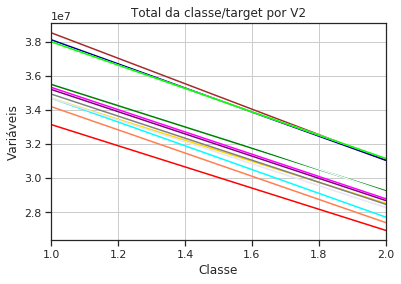

In [207]:
#Visualizando todas as variáveis com target
x = df.groupby(['Class']).sum()

x['V1'].plot(kind = 'line',color='green', title='Total da classe/target por V1',grid=True, stacked=True)
x['V2'].plot(kind = 'line',color='red', title='Total da classe/target por V2',grid=True, stacked=True)
x['V3'].plot(kind = 'line',color='purple', title='Total da classe/target por V2',grid=True, stacked=True)
x['V4'].plot(kind = 'line',color='aqua', title='Total da classe/target por V2',grid=True, stacked=True)
x['V5'].plot(kind = 'line',color='azure', title='Total da classe/target por V2',grid=True, stacked=True)
x['V6'].plot(kind = 'line',color='brown', title='Total da classe/target por V2',grid=True, stacked=True)
x['V7'].plot(kind = 'line',color='coral', title='Total da classe/target por V2',grid=True, stacked=True)
x['V8'].plot(kind = 'line',color='darkblue', title='Total da classe/target por V2',grid=True, stacked=True)
x['V9'].plot(kind = 'line',color='gold', title='Total da classe/target por V2',grid=True, stacked=True)
x['V10'].plot(kind = 'line',color='grey', title='Total da classe/target por V2',grid=True, stacked=True)
x['V11'].plot(kind = 'line',color='lavender', title='Total da classe/target por V2',grid=True, stacked=True)
x['V12'].plot(kind = 'line',color='magenta', title='Total da classe/target por V2',grid=True, stacked=True)
x['V13'].plot(kind = 'line',color='beige', title='Total da classe/target por V2',grid=True, stacked=True)
x['V13'].plot(kind = 'line',color='lime', title='Total da classe/target por V2',grid=True, stacked=True)

plt.xlabel("Classe")
plt.ylabel("Variáveis")

Text(0, 0.5, 'V1')

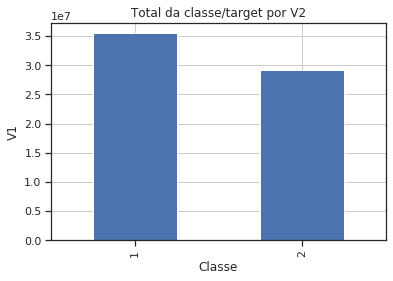

In [210]:
x = df.groupby(['Class']).sum()

x['V1'].plot(kind = 'bar',color='b', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V1")

Text(0, 0.5, 'V2')

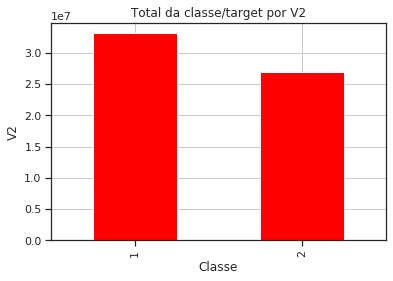

In [211]:
x = df.groupby(['Class']).sum()

x['V2'].plot(kind = 'bar',color='red', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V2")

Text(0, 0.5, 'V3')

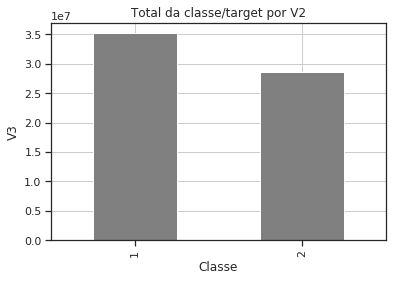

In [213]:
x = df.groupby(['Class']).sum()

x['V3'].plot(kind = 'bar',color='gray', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V3")

Text(0, 0.5, 'V4')

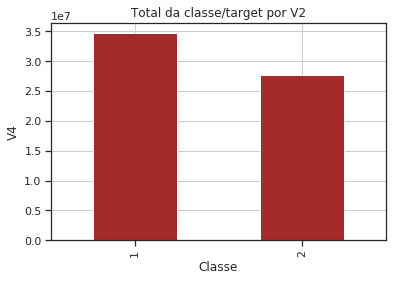

In [214]:
x = df.groupby(['Class']).sum()

x['V4'].plot(kind = 'bar',color='brown', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V4")

Text(0, 0.5, 'V5')

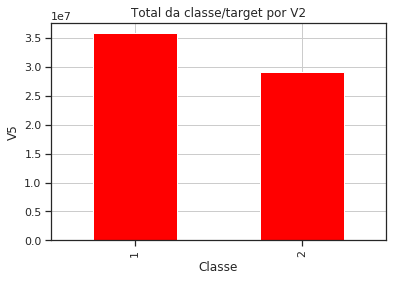

In [215]:
x = df.groupby(['Class']).sum()

x['V5'].plot(kind = 'bar',color='red', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V5")

Text(0, 0.5, 'V6')

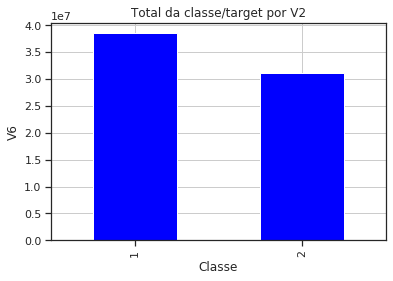

In [216]:
x = df.groupby(['Class']).sum()

x['V6'].plot(kind = 'bar',color='blue', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V6")

Text(0, 0.5, 'V7')

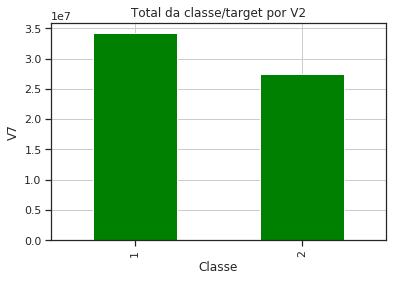

In [217]:
x = df.groupby(['Class']).sum()

x['V7'].plot(kind = 'bar',color='green', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V7")

Text(0, 0.5, 'V8')

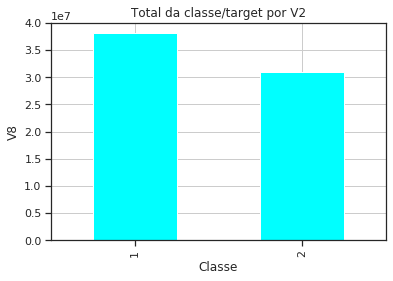

In [218]:
x = df.groupby(['Class']).sum()

x['V8'].plot(kind = 'bar',color='cyan', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V8")

Text(0, 0.5, 'V9')

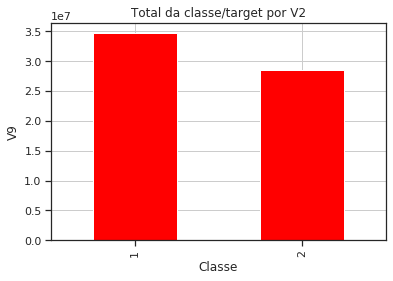

In [219]:
x = df.groupby(['Class']).sum()

x['V9'].plot(kind = 'bar',color='red', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V9")

Text(0, 0.5, 'V10')

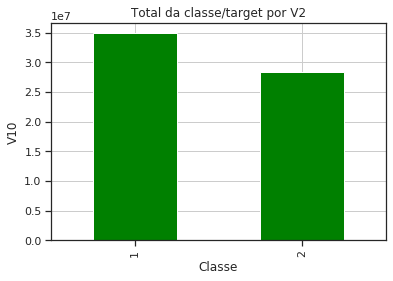

In [220]:
x = df.groupby(['Class']).sum()

x['V10'].plot(kind = 'bar',color='green', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V10")

Text(0, 0.5, 'V11')

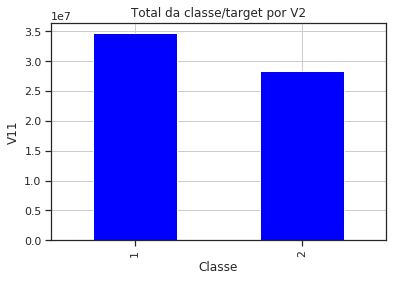

In [221]:
x = df.groupby(['Class']).sum()

x['V11'].plot(kind = 'bar',color='blue', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V11")

Text(0, 0.5, 'V12')

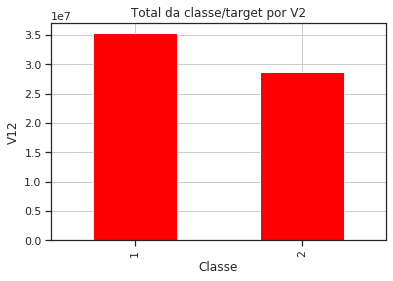

In [222]:
x = df.groupby(['Class']).sum()

x['V12'].plot(kind = 'bar',color='red', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V12")

Text(0, 0.5, 'V13')

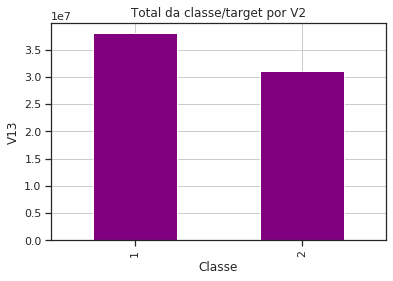

In [225]:
x = df.groupby(['Class']).sum()

x['V13'].plot(kind = 'bar',color='purple', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V13")

Text(0, 0.5, 'V14')

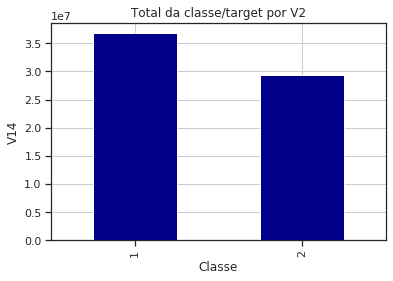

In [226]:
x = df.groupby(['Class']).sum()

x['V14'].plot(kind = 'bar',color='darkblue', title='Total da classe/target por V2',grid=True, stacked=True)
plt.xlabel("Classe")
plt.ylabel("V14")

Não consegui extrari nenhuma informação dos gráficos acima

In [8]:
print ('No de dimensões:',df.ndim)

No de dimensões: 2


In [9]:
# a base não possui valores nulos e nem ausentes
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
Class    0
dtype: int64

In [123]:
#  gráficos de dispersão para relações conjuntas das features sem o target)
%matplotlib inline
import seaborn as sns

sns.pairplot(df)


Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Todas as features são numéricas
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
V11      float64
V12      float64
V13      float64
V14      float64
Class      int64
dtype: object

In [11]:
# Há uma discrepância entre os valores minimos e máximos conforme observamos abaixo.
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,1.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,1.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,1.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,1.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,2.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,2.000000




---


# Recuperação dos ID dos maiores valores elencados acima para avaliar o desemplenho dos modelos


In [12]:
filtered_df = [df[df['V1'] == 309231.000000]] 
filtered_df

[             V1       V2       V3       V4  ...      V12       V13      V14  Class
 11509  309231.0  5500.51  6880.51  5416.41  ...  2257.95  152308.0  5022.56      2
 
 [1 rows x 15 columns]]

In [13]:
filtered_df = [df[df['V4'] == 642564.000000]]
filtered_df

[            V1       V2       V3        V4  ...      V12     V13       V14  Class
 10386  7398.46  2830.77  2457.44  642564.0  ...  6904.62  3504.1  121026.0      1
 
 [1 rows x 15 columns]]

In [14]:
filtered_df = [df[df['V6'] == 362564.000000]]
filtered_df

[          V1       V2      V3       V4  ...      V12     V13       V14  Class
 898  7222.05  3797.95  1040.0  3733.85  ...  3091.28  276.41  715897.0      1
 
 [1 rows x 15 columns]]

In [15]:
filtered_df = [df[df['V7'] == 567179.000000]]
filtered_df

[            V1       V2       V3        V4  ...      V12     V13       V14  Class
 10386  7398.46  2830.77  2457.44  642564.0  ...  6904.62  3504.1  121026.0      1
 
 [1 rows x 15 columns]]

In [16]:
filtered_df = [df[df['V9'] == 265641.000000]]
filtered_df

[             V1       V2       V3       V4  ...      V12       V13      V14  Class
 11509  309231.0  5500.51  6880.51  5416.41  ...  2257.95  152308.0  5022.56      2
 
 [1 rows x 15 columns]]

In [17]:
filtered_df = [df[df['V13'] == 152308.000000]]
filtered_df

[             V1       V2       V3       V4  ...      V12       V13      V14  Class
 11509  309231.0  5500.51  6880.51  5416.41  ...  2257.95  152308.0  5022.56      2
 
 [1 rows x 15 columns]]

In [18]:
filtered_df = [df[df['V14'] == 715897.000000]]
filtered_df

[          V1       V2      V3       V4  ...      V12     V13       V14  Class
 898  7222.05  3797.95  1040.0  3733.85  ...  3091.28  276.41  715897.0      1
 
 [1 rows x 15 columns]]

In [19]:
filtered_df = [df[df['V13'] == 86.666700]]
filtered_df

[            V1       V2       V3       V4  ...      V12      V13      V14  Class
 13179  1030.77  7804.62  5762.56  2453.33  ...  7002.56  86.6667  1366.15      1
 
 [1 rows x 15 columns]]

In [0]:
# Exclusão dos ID de valores máximo: 11509, 10386, 898/898, 10386, 11509, 11509
# Exclusão do ID de valor mínimo: 13179
df = df.drop([11509, 10386, 898, 10386, 11509, 11509, 13179])

In [21]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,4301.378607,4009.507626,4264.083569,4122.377696,4341.561287,4620.060675,4072.823013,4615.788517,4201.341742,4231.202968,4202.150055,4279.089914,4606.009665,4361.304558,1.448851
std,37.770271,30.087356,21.335365,20.929477,17.007343,18.517252,20.910175,18.341333,17.841047,19.765889,24.475270,20.093956,33.405176,38.472996,0.497394
min,4197.950000,3905.640000,4197.440000,4058.460000,4304.620000,4566.150000,4026.150000,4567.180000,4147.690000,4152.820000,4100.000000,4201.030000,4443.080000,4205.640000,1.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,1.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,1.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,2.000000
max,4504.100000,4156.920000,4386.150000,4250.260000,4463.590000,4756.920000,4178.460000,4731.790000,4320.000000,4362.560000,4332.310000,4397.950000,4833.850000,4573.330000,2.000000


Após a exclusão dos IDs, a base ficou com 14976, sendo o tamanho inicial 14980.
Após a execução dos modelos, percebi que o desempenho ficou pior, portanto, a exclusão destes registros não foi utilizada no trabalho.


---



In [24]:
df.min()/df.max() #Minimum/maximum values

V1       0.003333
V2       0.362704
V3       0.151152
V4       0.003818
V5       0.322772
V6       0.007635
V7       0.003678
V8       0.628733
V9       0.005112
V10      0.272147
V11      0.479744
V12      0.322446
V13      0.000569
V14      0.001908
Class    0.500000
dtype: float64



---



In [0]:
# Separando o target(os valores que serão previstos)
target = df['Class']

# retirar a coluna Class/target do DataFrame
df = df.drop(['Class'],axis=1)


SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train, X_test, y_train, y_test = train_test_split(df, target, 
                                                    test_size=0.35, # 35% será amostra de teste
                                                    random_state=RANDOM_STATE, stratify=target)

In [81]:
print ('Quantidade de registros \n')
print('Dados de treino: X -', X_train.shape,'y:', y_train.shape,'\n','Dados de teste: X - ', X_test.shape,'y -', y_test.shape )

Quantidade de registros 

Dados de treino: X - (9737, 14) y: (9737,) 
 Dados de teste: X -  (5243, 14) y - (5243,)




---
**REMOÇÃO DE OUTLIERS**

Este item foi mantido somente como registro de como foi feita a tentativa de remover os registros considerados outliers, que após serem utilizados nos classificadores, a acurácio ficou muito ruim, portanto, não foi aproveitado no trabalho.
OBS: cógido disponível na internet


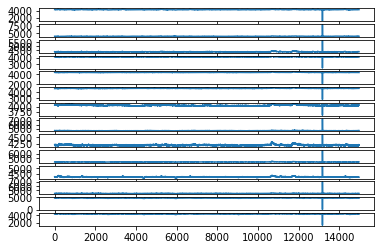

In [0]:
data = df
# recuperar dados como matriz numpy
values = data.values
# plotando os dados para avaliação
plt.figure()
for i in range(values.shape[1]):
	plt.subplot(values.shape[1], 1, i+1)
	plt.plot(values[:, i])
plt.show()

In [0]:
# detecção e remoção de outliers
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt

# step over each EEG column
for i in range(values.shape[1] - 1):
	# calculo da média de cada coluna e o desvio padrão
  data_mean, data_std = mean(values[:,i]), std(values[:,i]) 
	
  # define os limites do outlier
  cut_off = data_std * 4 
  lower, upper = data_mean - cut_off, data_mean + cut_off
	
  # remove os registros muito pequenos
  #too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
  #values = delete(values, too_small, 0)
  #print('>deleted %d rows' % len(too_small))
	# remove os registros muito grandes
  too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
  values = delete(values, too_large, 0)
  print('>deleted %d rows' % len(too_large))
# salva os registros excluídos num arquivo
savetxt('/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhos_sem_outliers.csv', values, delimiter=',')

In [0]:
print ("Registros excluídos:", len(df) - len(values), " / registros restantes: ", len(values))

Registros excluídos: 455  / registros restantes:  14525


In [0]:
data2.head(3)

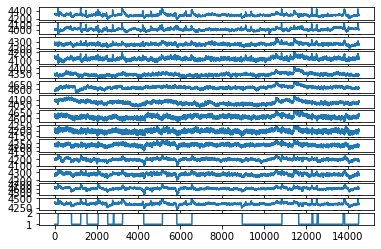

In [0]:
data2 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhos_sem_outliers.csv", header=None)
# recuperar dados como matriz numpy
values2 = data2.values
# crie uma subparcela para cada série temporal
plt.figure()
for i in range(values2.shape[1]):
	plt.subplot(values2.shape[1], 1, i+1)
	plt.plot(values2[:, i])
plt.show()

In [0]:
# renomeando as colunas
cols = ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14','Class')
data2.set_axis(cols, axis='columns', inplace=True)

In [0]:
# Separando o target(os valores que serão previstos)
target = data2['Class']

# retirar a coluna Class do DataFrame
data2 = data2.drop(['Class'],axis=1)

In [0]:
data2.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
count,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000,14525.000000
mean,4298.415807,4007.884030,4262.106650,4120.716830,4340.050009,4618.522758,4071.261819,4614.267459,4199.781888,4229.360751,4199.651756,4276.996635,4602.864780,4358.048363
std,33.639308,27.763142,17.527823,17.571408,12.705923,13.629126,18.154046,15.016888,14.386221,15.937125,19.751324,16.069722,27.966559,33.599349
min,4197.950000,3913.330000,4197.440000,4067.180000,4308.720000,4566.150000,4026.150000,4567.180000,4147.690000,4152.820000,4100.000000,4201.030000,4443.080000,4205.640000
25%,4280.510000,3990.260000,4250.260000,4108.210000,4331.790000,4611.790000,4057.440000,4604.620000,4190.260000,4220.000000,4189.740000,4267.180000,4590.260000,4341.540000
50%,4293.330000,4005.130000,4262.050000,4120.000000,4338.460000,4617.440000,4069.740000,4613.330000,4199.490000,4228.720000,4199.490000,4275.900000,4602.560000,4354.360000
75%,4309.230000,4021.540000,4269.230000,4130.260000,4346.150000,4626.150000,4082.560000,4623.080000,4208.720000,4238.460000,4210.260000,4286.150000,4615.900000,4370.770000
max,4472.310000,4154.870000,4367.690000,4203.590000,4416.410000,4685.130000,4141.540000,4674.870000,4258.460000,4292.820000,4280.000000,4341.540000,4721.030000,4496.920000



SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train, X_test, y_train, y_test = train_test_split(data2, target, 
                                                    test_size=0.35, # 35% será amostra de teste
                                                    random_state=RANDOM_STATE, stratify=target)

In [0]:
print ('Quantidade de registros \n')
print('Dados de treino: X -', X_train.shape,'y:', y_train.shape,'\n','Dados de teste: X - ', X_test.shape,'y -', y_test.shape )

X_train: (10728, 14) y_train: (10728,) 

X_test: (3576, 14) y_test: (3576,)


Fim da remoção dos outliers


---





### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

**Perceptron**

Para baseline foi escolhido o método mais simples de todos.

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

Perceptron sendo executado com os parâmetros padrão do Perceptron

In [60]:
from sklearn.linear_model import Perceptron

clf = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, 
                 tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, 
                 random_state=1, early_stopping=False, validation_fraction=0.1, 
                 n_iter_no_change=5, class_weight=None, warm_start=False)

clf.fit(X_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# predição do target
y_pred = clf.predict(X_test)


In [62]:
# visualização de métrica usando o classification report do sklearn
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.58      0.94      0.72      2890
           2       0.72      0.18      0.28      2353

    accuracy                           0.60      5243
   macro avg       0.65      0.56      0.50      5243
weighted avg       0.64      0.60      0.52      5243



**Análise**

Execução com parâmetros padrão: score 60%



#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

**NORMALIZANDO OS DADOS USANDO MIN/MAX**

Os dados foram normalizados para visualizar se há melhora na execução do Perceptron.

In [0]:
df2 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhosBD.csv")

In [64]:
df2.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1


In [65]:
# armazenando os rótulos das colunas para serem utilizados para a normalização, uma vez que esta altera o nome dos rótulos.
cols=df2.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'Class'],
      dtype='object')

In [0]:
# Apagando os IDs com valores muito discrepantes. 
# Esta remoção não foi mantida uma vez que observou-se priora na acurácia dos modelos.
df2 = df2.drop([11509, 10386, 898, 10386, 11509, 11509, 13179])

In [0]:
# execução da normalização Min?max do sklearn
# A normalização é feita feature a feature

from sklearn import preprocessing

x = df2 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() #dimensiona e traduz cada recurso individualmente, de modo que esteja no intervalo especificado no conjunto de treinamento (entre zero e um)
x_scaled = min_max_scaler.fit_transform(x)
df_normalizado = pd.DataFrame(x_scaled)
df_normalizado

# renomeando as colunas
df_normalizado.set_axis(cols, axis='columns', inplace=True)

In [46]:
df_normalizado.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,0.428809,0.412249,0.486408,0.467935,0.287098,0.104838,0.464644,0.448636,0.431548,0.408315,0.479015,0.403616,0.493436,0.511871,0.0
1,0.413751,0.393903,0.510890,0.470594,0.235453,0.107564,0.468059,0.436122,0.366084,0.352103,0.463562,0.398436,0.485554,0.485355,0.0
2,0.423779,0.402061,0.518997,0.510688,0.203183,0.091419,0.464644,0.383209,0.348210,0.330075,0.459171,0.411436,0.475062,0.499306,0.0


In [0]:
# Separando o Class/target
target_normalizado = df_normalizado.Class

In [0]:
# retirar a coluna Class/tarege do DataFrame
df_normalizado = df_normalizado.drop(['Class'],axis=1)

In [69]:
print (df_normalizado.shape, target_normalizado.shape)

(14976, 14) (14976,)


In [70]:
#Visualização dos dados normalizados
df_normalizado.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.428809,0.412249,0.486408,0.467935,0.287098,0.104838,0.464644,0.448636,0.431548,0.408315,0.479015,0.403616,0.493436,0.511871
1,0.413751,0.393903,0.510890,0.470594,0.235453,0.107564,0.468059,0.436122,0.366084,0.352103,0.463562,0.398436,0.485554,0.485355
2,0.423779,0.402061,0.518997,0.510688,0.203183,0.091419,0.464644,0.383209,0.348210,0.330075,0.459171,0.411436,0.475062,0.499306



SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste
X_train_normalizado, X_test_normalizado, y_train_normalizado, y_test_normalizado = train_test_split(df_normalizado, target_normalizado, 
                                                    test_size=0.35, # 35% será amostra de teste
                                                    random_state=RANDOM_STATE, stratify=target)

In [0]:
print ('Quantidade de registros \n')
print('Dados de treino: X -', X_train.shape,'y:', y_train.shape,'\n','Dados de teste: X - ', X_test.shape,'y -', y_test.shape )

Dados:  (9737, 14) Target: (9737,)



---
Executando o Perceptron com os dados normalizados e parâmetros padrão


In [0]:
# importação das bibliotecas necessárias para perceptron
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)

In [84]:
# Execução do perceptron
clf = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, 
       verbose=0, eta0=1.0, n_jobs=None, random_state=1, early_stopping=False, 
       validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)

clf.fit(X_train_normalizado, y_train_normalizado)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# predição do perceptron para o tareget
y_pred_normalizado = clf.predict(X_test_normalizado)


In [88]:
# visualização dos dados da execução do perceptro
from sklearn import metrics
print(metrics.classification_report(y_test_normalizado,y_pred_normalizado))

              precision    recall  f1-score   support

         0.0       0.55      0.98      0.71      2889
         1.0       0.58      0.03      0.05      2353

    accuracy                           0.55      5242
   macro avg       0.57      0.51      0.38      5242
weighted avg       0.56      0.55      0.41      5242



**Análise**

Execução com parâmetros padrão: score 60%

Execução com parâmetros padrão e dados normalizados: score 55%


##3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

Utilizando o cross validation para estimar a precisão do uso do perceptron no conjunto de dados, ajustando o modelo para usar esta parametrização e obter o melhor score.

In [0]:
# importando as bibliotecas necessárias
import multiprocessing
from sklearn.model_selection import GridSearchCV

In [0]:
# parâmetros a serem avaliados
param_grid = [
              {
                 'alpha':[0.0009, 0.0001, 0.001, 0.1],
                 'fit_intercept': [True, False],
                 'max_iter': [20, 100, 1000], 
                 'n_iter_no_change': [12, 22, 40],
                 'penalty':['l2','l1','elasticnet'],
                 'random_state': [1]
              }

]

gs = GridSearchCV(estimator=Perceptron(), param_grid=param_grid, scoring='accuracy', cv=15, n_jobs=multiprocessing.cpu_count())

In [91]:
# execução do gridsearch para definição dos melhores parâmetros do perceptron
# utilização dos dados sem normalização
gs.fit(df, target)

GridSearchCV(cv=15, error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'alpha': [0.0009, 0.0001, 0.001, 0.1],
                          'fit_intercept': [True, False],
                          'max_iter': [20, 100, 1000],
                          'n_iter_no_change': [12, 22, 40],
                          'penalty': ['l2', 'l1', 'elasticnet'],
                          'random_state': [1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             

In [92]:
# visualização da melhor combinação dos valores dos parâmetros do perceptron
gs.best_estimator_

Perceptron(alpha=0.001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=40, n_jobs=None,
           penalty='l1', random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
# importação da biblioteca do cross-validation
from sklearn.model_selection import cross_val_score

# execução do cross-validation com os parâmetros sugeridos pelo gridsearch
cross_val_score(gs.best_estimator_,df, target,scoring='accuracy',cv=10).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

0.5329035463004336


**Análise**

Execução com parâmetros padrão: score 60%

Execução com parâmetros padrão e sem dados normalizados: score 55%

Execução com parâmetros sugeridos pelo grid-search e dados sem normalização: score 53%


---




Execução do perceptron com dados normalizados e parâmetros sugeridos pelo gridsearch

In [0]:
# parâmetros a serem avaliados
param_grid = [
              {
                 'alpha':[0.0009, 0.0001, 0.001, 0.1],
                 'fit_intercept': [True, False],
                 'max_iter': [20, 100, 1000], 
                 'n_iter_no_change': [12, 22, 40],
                 'penalty':['l2','l1','elasticnet'],
                 'random_state': [1]
              }

]

gs_normalizado = GridSearchCV(estimator=Perceptron(), param_grid=param_grid, scoring='accuracy', cv=15, n_jobs=multiprocessing.cpu_count())

In [100]:
# execução do gridsearch para definição dos melhores parâmetros do perceptron
# utilização dos dados sem normalização
gs_normalizado.fit(df, target)

GridSearchCV(cv=15, error_score=nan,
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'alpha': [0.0009, 0.0001, 0.001, 0.1],
                          'fit_intercept': [True, False],
                          'max_iter': [20, 100, 1000],
                          'n_iter_no_change': [12, 22, 40],
                          'penalty': ['l2', 'l1', 'elasticnet'],
                          'random_state': [1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             

In [101]:
# visualização da melhor combinação dos valores dos parâmetros do perceptron
gs_normalizado.best_estimator_

Perceptron(alpha=0.001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=40, n_jobs=None,
           penalty='l1', random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
# importação da biblioteca do cross-validation
from sklearn.model_selection import cross_val_score

# execução do cross-validation com os parâmetros sugeridos pelo gridsearch
cross_val_score(gs_normalizado.best_estimator_,df, target,scoring='accuracy',cv=10).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

0.5329035463004336


**Análise**

Execução com parâmetros padrão e dados SEM normalização : score 60%

Execução com parâmetros padrão e dados COM normalização: score 55%

Execução com parâmetros sugeridos pelo grid-search e dados SEM normalização: score 53%

Execução com parâmetros sugeridos pelo grid-search e dados COM normalização: score 53%

Mesmo sendo um método muito simples, apresentou uma acurácia muito boa para na primeira execução. Como houve piora no score nas demais execuções a melhor a ser escolhida neste método é a primeira, ou seja, 60%.

#### 3.5) Qual método escolhido?

O método foi a **árvore de decisão**


#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [103]:
# uso da árvore com os parâmetros padrão, exceto o random-state, que é o mesmo utilizado em todo o trabalho.
# No baseline será utilizado os dados conforme base original
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [0]:
# prevendo o target dos dados não normalizados
y_pred = clf.predict(X_test)

In [0]:
# avaliando o resultado da predição
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.84      0.83      0.84      2889
           2       0.80      0.80      0.80      2353

    accuracy                           0.82      5242
   macro avg       0.82      0.82      0.82      5242
weighted avg       0.82      0.82      0.82      5242



**Análise** 

Execução com parâmetros padrão: score 82%

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

-- **Execução da árvore com os dados normalizados (MIN/MAX)** ---

In [105]:
# execução dos parâmetros padrão da biblioteca
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_normalizado, y_train_normalizado)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# prevendo o target com os dados normalizados
y_pred_normalizado = clf.predict(X_test_normalizado)

In [108]:
# analizando a execução da árvore
from sklearn import metrics
print(metrics.classification_report(y_test_normalizado,y_pred_normalizado))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      2889
         1.0       0.79      0.80      0.80      2353

    accuracy                           0.82      5242
   macro avg       0.81      0.82      0.81      5242
weighted avg       0.82      0.82      0.82      5242



**Análise**

Execução com parâmetros padrão: score 82%

Execução com parâmetros padrão e dados COM normalização: score 82%



## 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# importando a árvore
from sklearn import tree

# criando a árvore com o mesmo random-state utilizado no projeto
clf = tree.DecisionTreeClassifier(random_state=1, splitter='best')

In [0]:
# importando as bibliotecas necessárias para a classificação dos melhores parâmetros sugeridos pelo gridSearch
import multiprocessing
from sklearn.model_selection import GridSearchCV


In [111]:
# obtendo quais são os parâmetros disponíveis na árvore, para uso no grid-search
clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

**Execução do grid-search com dados normalizados**




In [0]:
param_grid = [
              {
                 'max_depth': range (5,10),
                 #'ccp_alpha=': range(0.1),
                 'min_samples_split': range(2, 6, 10),
                 'min_samples_leaf': range(1, 5, 9),
              }

]

gs_tree_normalizado = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=15, n_jobs=multiprocessing.cpu_count())

In [113]:
gs_tree_normalizado.fit(df_normalizado, target_normalizado)

GridSearchCV(cv=15, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid=[{'max_depth': range(5, 10),
                          'min_samples_leaf': range(1, 5, 9),
              

In [0]:
# visualização da melhor combinação definida pelo grid-search
gs_tree_normalizado.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [114]:
# execução do cros-validation usando os parâmetros sugeridos pelo grid-search
cross_val_score(gs_tree_normalizado.best_estimator_,df_normalizado, target_normalizado,scoring='accuracy',cv=15).mean()

0.5694922042951435

**Análise**

Execução com parâmetros padrão: score 82%

Execução com parâmetros padrão e dados COM normalização: score 82%

Execução com dados COM normalização e parâmetros sugeridos pelo cross-validation: score 57%

---
**Validação com dados SEM normalização**




In [0]:
param_grid = [
              {
                 'max_depth': range (5,10),
                 #'ccp_alpha=': range(0.1),
                 'min_samples_split': range(2, 6, 10),
                 'min_samples_leaf': range(1, 5, 9),
              }

]

gs_tree = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=15, n_jobs=multiprocessing.cpu_count())

In [116]:
# execução da árvore para definição da melhor combinação de valores
gs_tree.fit(df, target)

GridSearchCV(cv=15, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid=[{'max_depth': range(5, 10),
                          'min_samples_leaf': range(1, 5, 9),
              

In [117]:
# visualização da melhor combinação dos parâmetros da árvore, conforme execução do grid-search
gs_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [118]:
# Execução do cross-validation com os parâmetros sugeridos pelo grid-search
cross_val_score(gs_tree.best_estimator_,df, target,scoring='accuracy',cv=10).mean()

0.5441255898534942


---

**Análise final da decison tree**

Execução com parâmetros padrão: score 82%

Execução com parâmetros padrão e dados COM normalização: score 82%

Execução com dados COM normalização e parâmetros sugeridos pelo cross-validation: score 57%

Execução com dados SEM normalização e parâmetros sugeridos pelo cross-validation: score 55%

Conforme observamos nos dados acima, houve empate no melhor score, nas duas primeiras execuções, 82%.
Usando como comparação com o perceptro, eu escolheria a execução da árvore com os parâmetros padrão e os dados sem normalização.

## 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

# Resultado geral final da execução dos dois modelos escolhidos

**1 – Modelo Perceptron**

Execução com parâmetros padrão: score 60%

Execução com parâmetros padrão e dados COM normalização: score 55%

Execução com dados SEM normalização e parâmetros sugeridos pelo cross-validation: score 53%

Execução com dados COM normalização e parâmetros sugeridos pelo cross-validation: score 53%


**2 – Modelo Decision tree**

Execução com parâmetros padrão: score 82%

Execução com parâmetros padrão e dados COM normalização: score 82%

Execução com dados COM normalização e parâmetros sugeridos pelo cross-validation: score 57%

Execução com dados SEM normalização e parâmetros sugeridos pelo cross-validation: score 55%

-------------------------------------



Durante a execução do trabalho, concluí que a base de dados já está normalizada pois após a normalização, houve piora na execução dos modelos.

Quanto a execução do perceptron, parece que os dados não são linearmente separáveis.

O modelo que seria escolhido para uso em produção seria a árvore de decisão, por ter um melhor score. Um risco que poderia acontecer ao utilizá-la é estar com oberfitin (sobreajuste). Se em produção houver dados que não existiam na base de treino e teste, novas árvores serão produzidas, ou seja, pode ser instável. 